# Introduction

In this initial Exploratory Data Analysis, we aim to run through our Data for the two states that we have selected (California and Alaska) and explore the features in each dataset. Through this exploration we want to find possible dependent variables that summarize the data and determine which features might have correlations with these dependent variables. 

In [24]:
from pyspark.sql.functions import *
import numpy as np
import pandas as pd

# Converting Our Files to Parquet

In [2]:
'''
fnames = !gsutil ls gs://final_proj_bucket/VM2Uniform/*.zip
for one in fnames:
    fullpath = one                # gs://pstat135-voter-file/VM2Uniform/VM2Uniform--NY--2021-03-15.zip 
    gcs_path = !dirname {one}     # [gs://pstat135-voter-file/VM2Uniform]
    gcs_path = gcs_path[0]        # gs://pstat135-voter-file/VM2Uniform
    filename = !basename {one}    # [VM2Uniform--NY--2021-03-15.zip]
    filename = filename[0]        # VM2Uniform--NY--2021-03-15.zip
    
    # fileroot: VM2Uniform--NY--2021-03-15
    # fileext : zip
    fileroot, fileext = filename.split('.')   

    print("##########################")
    print(filename)
    print(gcs_path)
    print(fileroot, fileext)
    
    !gsutil -m cp {one} .                     # copy to local disk
    !unzip {filename}                         # unzip
    !gsutil -m cp {fileroot}* {gcs_path}/     # copy raw files to bucket
    # !echo '{fileroot}*'
    tabfile = gcs_path+'/'+fileroot+'.tab'    # full path to tab file
    pqpath = gcs_path+'/'+fileroot            # parquet file directory
    
    df = spark.read.csv(tabfile, header = True, sep='\t') # read tab file
    df.write.mode('overwrite').parquet(pqpath)            # write data as parquet file
    
    !rm /{fileroot}*  
'''

'\nfnames = !gsutil ls gs://final_proj_bucket/VM2Uniform/*.zip\nfor one in fnames:\n    fullpath = one                # gs://pstat135-voter-file/VM2Uniform/VM2Uniform--NY--2021-03-15.zip \n    gcs_path = !dirname {one}     # [gs://pstat135-voter-file/VM2Uniform]\n    gcs_path = gcs_path[0]        # gs://pstat135-voter-file/VM2Uniform\n    filename = !basename {one}    # [VM2Uniform--NY--2021-03-15.zip]\n    filename = filename[0]        # VM2Uniform--NY--2021-03-15.zip\n    \n    # fileroot: VM2Uniform--NY--2021-03-15\n    # fileext : zip\n    fileroot, fileext = filename.split(\'.\')   \n\n    print("##########################")\n    print(filename)\n    print(gcs_path)\n    print(fileroot, fileext)\n    \n    !gsutil -m cp {one} .                     # copy to local disk\n    !unzip {filename}                         # unzip\n    !gsutil -m cp {fileroot}* {gcs_path}/     # copy raw files to bucket\n    # !echo \'{fileroot}*\'\n    tabfile = gcs_path+\'/\'+fileroot+\'.tab\'    # full 

# Creating Dataframes from Parquet Files

In [3]:
bucket_dir = 'gs://pstat135-voter-file/VM2Uniform/'
AK_df_ezra = spark.read.parquet(bucket_dir + 'VM2Uniform--AK--2021-02-03')
CA_df_ezra = spark.read.parquet(bucket_dir + 'VM2Uniform--CA--2021-05-02')

In [4]:
bucket_dir = 'gs://pstat135-voter-file/VM2Uniform/'
AK_df_branson = spark.read.parquet(bucket_dir + 'VM2Uniform--AK--2021-02-03')
CA_df_branson = spark.read.parquet(bucket_dir + 'VM2Uniform--CA--2021-05-02')

In [5]:
bucket_dir = 'gs://pstat135-voter-file/VM2Uniform/'
AK_df = spark.read.parquet(bucket_dir + 'VM2Uniform--AK--2021-02-03')
CA_df = spark.read.parquet(bucket_dir + 'VM2Uniform--CA--2021-05-02')

# Explorative Data Analysis (EDA): Alaska Dataframe

## Alaska Dataframe Dimensions and Schema

First let's look at the number of rows and columns in our dataframe...

In [6]:
print("Number of Rows:    ", AK_df_ezra.count(), \
      "\nNumber of Columns: ", len(AK_df_ezra.columns))

Number of Rows:     548259 
Number of Columns:  726


As we can see for our Alaska dataframe, we have $548,259$ rows and $726$ columns.

Now let us look at all of the features (or column variables) we have available to us in our dataframe...

In [7]:
#AK_df_ezra.printSchema()

We clearly have a lot of features (726 to be exact) to consider in this dataframe that we must further understand and explore prior to our feature selection and feature engineering phase.

## Location in Alaska and Voter Parties

### City of Residence for Voters

In [8]:
# Number of Distinct Cities
AK_df_ezra.select(countDistinct('Residence_Addresses_City')).show()

# Number of Distinct Counties
AK_df_ezra.select(countDistinct('County').alias("Number_of_Counties")).show()

# Number of Voters per each Distinct County
AK_votes_per_county = AK_df_ezra.groupBy('County') \
    .agg(countDistinct('LALVOTERID').alias("Number_Voters")) \
    .sort(desc("Number_Voters"))
AK_votes_per_county.show(truncate=False)

# Number of Distinct Parties
AK_df_ezra.select(countDistinct('Parties_Description').alias("Number_of_Parties")).show()

# Number of Voters per each Distinct Party
AK_votes_per_party = AK_df_ezra.groupBy('Parties_Description') \
    .agg(countDistinct('LALVOTERID').alias("Number_Voters")) \
    .sort(desc("Number_Voters"))
AK_votes_per_party.show(truncate=False)

# Number of Voters per each Distinct Party in each Distinct County
AK_votes_per_partycounty = AK_df_ezra.groupBy('County', 'Parties_Description') \
    .agg(countDistinct('LALVOTERID').alias("Number_Voters")) \
    .sort(desc("Number_Voters"))
AK_votes_per_partycounty.show(truncate=False)

+----------------------------------------+
|count(DISTINCT Residence_Addresses_City)|
+----------------------------------------+
|                                    2705|
+----------------------------------------+

+------------------+
|Number_of_Counties|
+------------------+
|                29|
+------------------+



+---------------------+-------------+
|County               |Number_Voters|
+---------------------+-------------+
|ANCHORAGE            |218565       |
|MATANUSKA SUSITNA    |82135        |
|FAIRBANKS NORTH STAR |69054        |
|KENAI PENINSULA      |49094        |
|JUNEAU               |25984        |
|KETCHIKAN GATEWAY    |11327        |
|BETHEL               |11296        |
|KODIAK ISLAND        |9145         |
|VALDEZ CORDOVA       |8122         |
|SITKA                |6933         |
|NOME                 |6403         |
|SOUTHEAST FAIRBANKS  |5779         |
|NORTH SLOPE          |4893         |
|KUSILVAK             |4801         |
|NORTHWEST ARCTIC     |4572         |
|PRINCE OF WALES HYDER|4332         |
|YUKON KOYUKUK        |4047         |
|DILLINGHAM           |3302         |
|PETERSBURG           |3223         |
|ALEUTIANS WEST       |2399         |
+---------------------+-------------+
only showing top 20 rows



+-----------------+
|Number_of_Parties|
+-----------------+
|                9|
+-----------------+



+-------------------+-------------+
|Parties_Description|Number_Voters|
+-------------------+-------------+
|Unknown            |237742       |
|Republican         |133370       |
|Non-Partisan       |75520        |
|Democratic         |73994        |
|Independence       |17667        |
|Libertarian        |6202         |
|Other              |1765         |
|Green Libertarian  |1406         |
|Constitution       |593          |
+-------------------+-------------+



+--------------------+-------------------+-------------+
|County              |Parties_Description|Number_Voters|
+--------------------+-------------------+-------------+
|ANCHORAGE           |Unknown            |92933        |
|ANCHORAGE           |Republican         |49294        |
|MATANUSKA SUSITNA   |Unknown            |34660        |
|ANCHORAGE           |Democratic         |33821        |
|ANCHORAGE           |Non-Partisan       |31446        |
|FAIRBANKS NORTH STAR|Unknown            |30291        |
|MATANUSKA SUSITNA   |Republican         |27552        |
|KENAI PENINSULA     |Unknown            |20047        |
|FAIRBANKS NORTH STAR|Republican         |17476        |
|KENAI PENINSULA     |Republican         |15421        |
|JUNEAU              |Unknown            |10601        |
|MATANUSKA SUSITNA   |Non-Partisan       |10349        |
|FAIRBANKS NORTH STAR|Non-Partisan       |8964         |
|FAIRBANKS NORTH STAR|Democratic         |8771         |
|KENAI PENINSULA     |Non-Parti

### Distribution of Data

In [9]:
# Number of Voters per each Distinct County
AK_votes_per_county_df = AK_votes_per_county.toPandas()

# Number of Voters per each Distinct Party
AK_votes_per_party_df = AK_votes_per_party.toPandas()

# Number of Voters per each Distinct Party in each Distinct County
AK_votes_per_partycounty_df = AK_votes_per_partycounty.toPandas()

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Number of Voters per each Distinct County

In [11]:
AK_votes_per_county_df.head(29)

,County,Number_Voters
0,ANCHORAGE,218565
1,MATANUSKA SUSITNA,82135
2,FAIRBANKS NORTH STAR,69054
3,KENAI PENINSULA,49094
4,JUNEAU,25984
5,KETCHIKAN GATEWAY,11327
6,BETHEL,11296
7,KODIAK ISLAND,9145
8,VALDEZ CORDOVA,8122
9,SITKA,6933


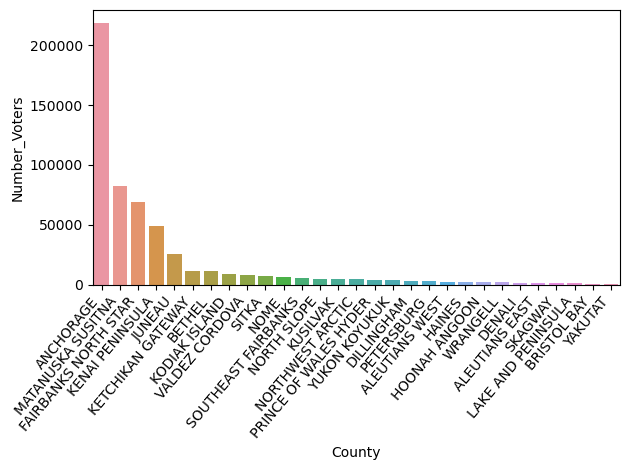

In [12]:
ax1 = sns.barplot(data = AK_votes_per_county_df, \
            x = 'County', \
            y = 'Number_Voters')

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=50, ha="right")
plt.tight_layout()
plt.show()

#### Number of Voters per each Distinct Party

In [13]:
AK_votes_per_party_df.head(9)

,Parties_Description,Number_Voters
0,Unknown,237742
1,Republican,133370
2,Non-Partisan,75520
3,Democratic,73994
4,Independence,17667
5,Libertarian,6202
6,Other,1765
7,Green Libertarian,1406
8,Constitution,593


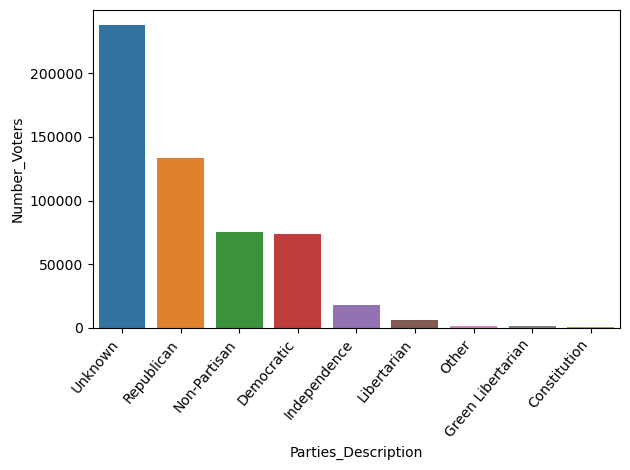

In [14]:
ax2 = sns.barplot(data = AK_votes_per_party_df, \
            x = 'Parties_Description', \
            y = 'Number_Voters')

ax2.set_xticklabels(ax2.get_xticklabels(), rotation=50, ha="right")
plt.tight_layout()
plt.show()

#### Number of Voters per each Distinct Party in each Distinct County

In [15]:
AK_votes_per_partycounty_df

,County,Parties_Description,Number_Voters
0,ANCHORAGE,Unknown,92933
1,ANCHORAGE,Republican,49294
2,MATANUSKA SUSITNA,Unknown,34660
3,ANCHORAGE,Democratic,33821
4,ANCHORAGE,Non-Partisan,31446
...,...,...,...
251,ALEUTIANS EAST,Constitution,1
252,DILLINGHAM,Constitution,1
253,ALEUTIANS WEST,Constitution,1
254,HAINES,Constitution,1


In [16]:
cols = AK_votes_per_county_df[['County']]
cols.head(5)

,County
0,ANCHORAGE
1,MATANUSKA SUSITNA
2,FAIRBANKS NORTH STAR
3,KENAI PENINSULA
4,JUNEAU


'\nax3.set_xticklabels(ax3.get_xticklabels(), rotation=50, ha="right")\nplt.tight_layout()\nplt.show()\n'

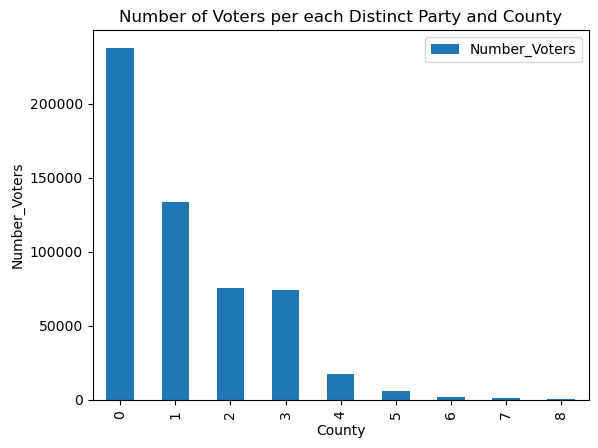

In [17]:
index = ['ANCHORAGE', 'MATANUSKA SUSITNA', \
         'FAIRBANKS NORTH STAR', 'KENAI PENINSULA', \
         'JUNEAU']

AK_votes_per_party_df.plot(kind='bar', stacked=True)

plt.xlabel('County')
plt.ylabel('Number_Voters')

plt.title('Number of Voters per each Distinct Party and County')

"""
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=50, ha="right")
plt.tight_layout()
plt.show()
"""

### Missing Value Handling

In [18]:
AK_cols_list = AK_df_ezra.columns # list of columns in AK_df

def count_missingvals(df, col_list):
    
    """Given dataframe of state voter files and its list of columns, returns the number of missing values
    
    Args:
        df: Dataframe of state voter files 
            Object type should be the output spark.read.parquet() function
        col_list: List of column names
            Object type should be the output df.columns
            
    
    Returns:
        df2.show(): 
    """
    
    df2 = df.select([count(when(col(i).contains('None') | \
                                col(i).contains('NULL') | \
                               (col(i) == '') | \
                                col(i).isNull() | \
                                isnan(i), i)).alias(i)
                    for i in col_list])
    
    return df2.show()

In [19]:
#index = ['ANCHORAGE', 'MATANUSKA SUSITNA', 'FAIRBANKS NORTH STAR', 'KENAI PENINSULA', 'JUNEAU']count_missingvals(AK_df_ezra, AK_cols_list[:3])

## Party Affiliation for Age, Gender, Marital Status Voters in Alaska

In [20]:
features_to_include_AK = AK_df_branson.select(['LALVOTERID','Voters_Age','Voters_Gender','MaritalStatus_Description','Parties_Description']).sample(False, 0.75, 42)


In [21]:
features_branson_AK = features_to_include_AK.toPandas()


In [22]:
dropped_na_pandas_AK = features_branson_AK.dropna()
# dropped_na_pandas_AK
features_branson_AK

,LALVOTERID,Voters_Age,Voters_Gender,MaritalStatus_Description,Parties_Description
0,LALAK176775952,70,M,Non-Traditional,Non-Partisan
1,LALAK177125249,None,F,None,Unknown
2,LALAK410115488,59,M,None,Non-Partisan
3,LALAK177038764,51,F,Non-Traditional,Democratic
4,LALAK176844885,62,M,Non-Traditional,Non-Partisan
...,...,...,...,...,...
411385,LALAK176818442,58,M,None,Unknown
411386,LALAK176943144,65,F,None,Non-Partisan
411387,LALAK176935447,45,F,None,Unknown
411388,LALAK176767123,65,M,None,Republican


In [25]:
dropped_na_pandas_AK.apply(lambda x : pd.factorize(x)[0]).corr()

,LALVOTERID,Voters_Age,Voters_Gender,MaritalStatus_Description,Parties_Description
LALVOTERID,1.000000,0.003471,-0.000629,-0.005591,-0.004949
Voters_Age,0.003471,1.000000,0.011402,-0.006502,0.007349
Voters_Gender,-0.000629,0.011402,1.000000,-0.000182,-0.000723
MaritalStatus_Description,-0.005591,-0.006502,-0.000182,1.000000,0.014868
Parties_Description,-0.004949,0.007349,-0.000723,0.014868,1.000000


Now to get an idea of some of the general patterns, we will use some aggregate functions on our dataframe after dropping the Null values

In [26]:
gender_count = dropped_na_pandas_AK.groupby('Voters_Gender').agg({'Voters_Gender':'count'})
gender_count.rename(columns={"Voters_Gender": 'count'})

,count
Voters_Gender,
F,36461
M,36269


In [27]:
married_count = dropped_na_pandas_AK.groupby('MaritalStatus_Description').agg({'MaritalStatus_Description':'count'})
married_count.rename(columns={"MaritalStatus_Description": 'count'})

,count
MaritalStatus_Description,
Married,59516
Non-Traditional,13214


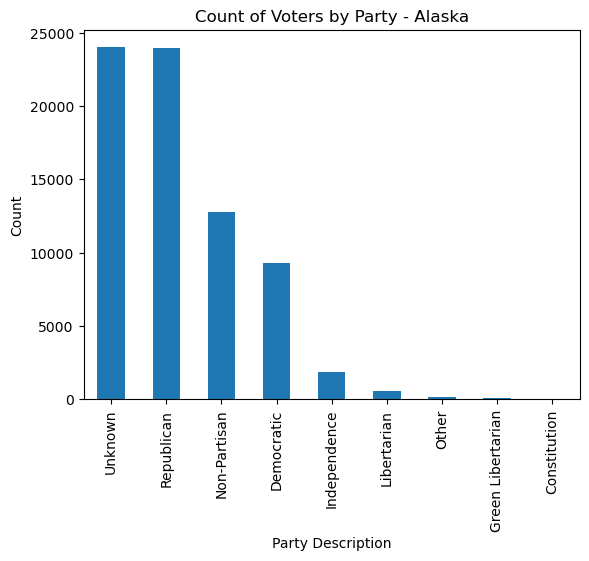

In [28]:
dropped_na_pandas_AK['Parties_Description'].value_counts().plot(kind='bar')
plt.title('Count of Voters by Party - Alaska')
plt.xlabel('Party Description')
plt.ylabel('Count')
plt.show()

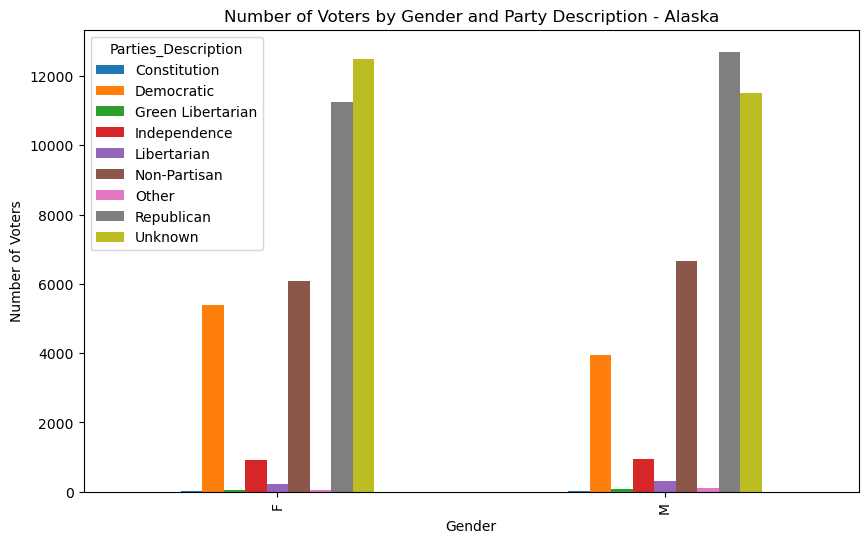

In [29]:
counts = dropped_na_pandas_AK.groupby(['Voters_Gender', 'Parties_Description']).size().unstack()


counts.plot(kind='bar', figsize=(10,6))


plt.title('Number of Voters by Gender and Party Description - Alaska')
plt.xlabel('Gender')
plt.ylabel('Number of Voters')


plt.show()

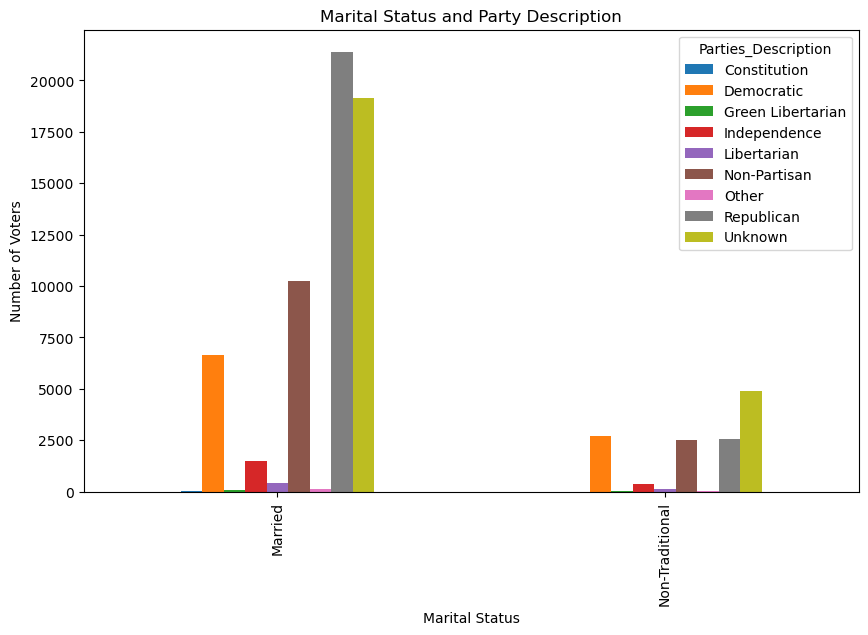

In [34]:
married_counts = dropped_na_pandas_AK.groupby(['MaritalStatus_Description', 'Parties_Description']).size().unstack()


married_counts.plot(kind='bar', figsize=(10,6))


plt.title('Marital Status and Party Description')
plt.xlabel('Marital Status')
plt.ylabel('Number of Voters')


plt.show()

## Party Affiliation based on Level of Education in Alaska

In [53]:
#AK_df['Voters_Active'].show(10)

#columns = ["CommericalData_Education","CommercialData_OccupationGroup","CommercialData_Hispanic_Country_Origin","Voters_Active", "Parties_Description"]
#df_temp = spark.createDataFrame(data = AK_df, schema = columns)
#df_temp.show(truncate=False)

#AK_df.select(AK_df["CommericalData_Education"],AK_df["CommericalData_OccupationGroup"], AK_df["CommericalData_Hispanic_Country_Origin"], AK_df["Voters_Active"], AK_df["Parties_Descriptions"]).show(10)  



#AK_df[AK_df['CommercialData_Education']].show(10)
#filtered_df = AK_df.filter(F.col(['Voters_Active','Parties_Description','CommercialData_Education', 'CommercialData_OccupationGroup', 'CommercialData_Education'])).collect()
#AK_df[AK_df["CommercialData_Education"]].head()

#new_df = AK_df.filter(["CommercialData_Education", "CommercialData_OccupationGroup", "Voters_Active", "Parties_Description"], axis = 1)
                      
#new_df = pd.DataFrame([AK_df.CommercialData_Education & AK_df.CommercialData_OccupationGroup & AK_df.Voters_Active]).transpose()                      
    
new_df = AK_df.select("CommercialData_Education", "CommercialData_OccupationGroup", "Voters_Active", "Parties_Description")
new_df.show()
pandas_new_df = new_df.toPandas()

pd.crosstab(pandas_new_df['Parties_Description'], pandas_new_df['CommercialData_Education'])




    


+------------------------+------------------------------+-------------+-------------------+
|CommercialData_Education|CommercialData_OccupationGroup|Voters_Active|Parties_Description|
+------------------------+------------------------------+-------------+-------------------+
|    Grad Degree - Ext...|          Technical: Comput...|            A|       Non-Partisan|
|                    null|                          null|            A|            Unknown|
|                    null|                          null|            A|         Democratic|
|    Grad Degree - Likely|                         Other|            A|       Non-Partisan|
|    Bach Degree - Ext...|          Professional: Leg...|            A|         Democratic|
|    Some College -Ext...|          Professional: Leg...|            A|       Non-Partisan|
|    Bach Degree - Likely|          Professional: Leg...|            A|            Unknown|
|    Bach Degree - Likely|          Technical: Comput...|            A|         

CommercialData_Education,Bach Degree - Extremely Likely,Bach Degree - Likely,Grad Degree - Extremely Likely,Grad Degree - Likely,HS Diploma - Extremely Likely,HS Diploma - Likely,Less than HS Diploma - Ex Like,Less than HS Diploma - Likely,Some College - Likely,Some College -Extremely Likely,Vocational Technical Degree - Extremely Likely
Parties_Description,,,,,,,,,,,
Constitution,10,15,4,12,17,36,0,10,53,9,1
Democratic,5136,3860,2993,2483,4409,5762,2,1639,7781,1433,64
Green Libertarian,46,69,29,51,63,90,0,15,155,20,2
Independence,887,734,368,504,1133,1428,2,381,2060,385,21
Libertarian,239,323,87,189,254,414,0,108,740,99,8
Non-Partisan,6180,4189,3358,2851,5962,5878,7,1433,8550,2058,91
Other,57,65,13,45,93,127,0,45,193,29,6
Republican,10561,7466,4939,5012,10293,9502,6,2283,17264,4033,172
Unknown,11698,11285,5056,7277,13097,16830,12,4903,29308,4350,236


<AxesSubplot:xlabel='Parties_Description'>

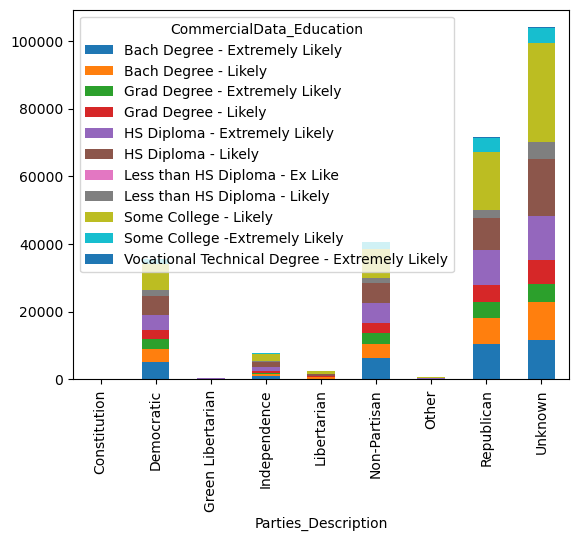

In [55]:
pd.crosstab(pandas_new_df['Parties_Description'], pandas_new_df['CommercialData_Education']).plot.bar(stacked=True)


## Voter Activity based on Voter Occupation in Alaska

In [58]:
pd.crosstab(pandas_new_df['Voters_Active'], pandas_new_df['CommercialData_OccupationGroup'])

CommercialData_OccupationGroup,Blue Collar,Farming/Fish/Forestry,Management/Business and Financial Operations,Office and Administrative Support,Other,Professional: Legal/Education and Health Practiti,Retired,Sales,Technical: Computers/Math and Architect/Engineeri,Technical: Computers/Math and Architect/Engineerin
Voters_Active,,,,,,,,,,
A,42658,1330,26237,24107,45649,33828,37254,12812,1665,7445
I,1288,28,359,460,1889,682,348,285,20,131


<AxesSubplot:xlabel='Voters_Active'>

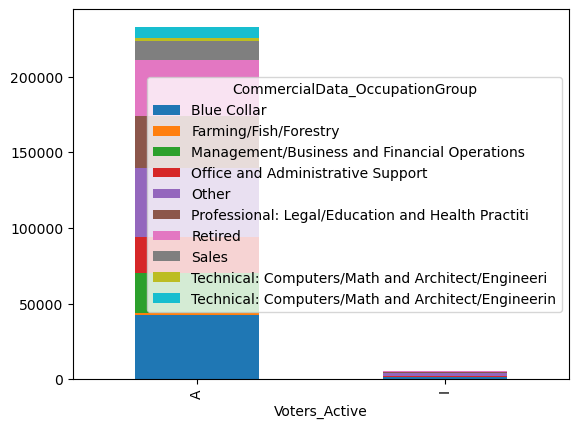

In [59]:
pd.crosstab(pandas_new_df['Voters_Active'], pandas_new_df['CommercialData_OccupationGroup']).plot.bar(stacked = True)

# Explorative Data Analysis (EDA): California Dataframe

## California Dataframe Dimensions and Schema

First let's look at the number of rows and columns in our dataframe...

In [60]:
print("Number of Rows:    ", CA_df_ezra.count(), \
      "\nNumber of Columns: ", len(CA_df_ezra.columns))

Number of Rows:     21779518 
Number of Columns:  726


As we can see for our California dataframe, we have $21,779,518$ rows and $726$ columns.

Now let us look at all of the features (or column variables) we have available to us in our dataframe...

In [61]:
#CA_df_ezra.printSchema()

We clearly have a lot of features (726 to be exact) to consider in this dataframe that we must further understand and explore prior to our feature selection and feature engineering phase.

## Location in California and Voter Party

### City of Residence for Voters

In [62]:
# Number of Distinct Cities
CA_df_ezra.select(countDistinct('Residence_Addresses_City')).show()

# Number of Distinct Counties
CA_df_ezra.select(countDistinct('County').alias("Number_of_Counties")).show()

# Number of Voters per each Distinct County
CA_votes_per_county = CA_df_ezra.groupBy('County') \
    .agg(countDistinct('LALVOTERID').alias("Number_Voters")) \
    .sort(desc("Number_Voters"))
CA_votes_per_county.show(truncate=False)

# Number of Distinct Parties
CA_df_ezra.select(countDistinct('Parties_Description').alias("Number_of_Parties")).show()

# Number of Voters per each Distinct Party
CA_votes_per_party = CA_df_ezra.groupBy('Parties_Description') \
    .agg(countDistinct('LALVOTERID').alias("Number_Voters")) \
    .sort(desc("Number_Voters"))
CA_votes_per_party.show(truncate=False)

# Number of Voters per each Distinct Party in each Distinct County
CA_votes_per_partycounty = CA_df_ezra.groupBy('County', 'Parties_Description') \
    .agg(countDistinct('LALVOTERID').alias("Number_Voters")) \
    .sort(desc("Number_Voters"))
CA_votes_per_partycounty.show(truncate=False)

+----------------------------------------+
|count(DISTINCT Residence_Addresses_City)|
+----------------------------------------+
|                                    1519|
+----------------------------------------+



+------------------+
|Number_of_Counties|
+------------------+
|                58|
+------------------+



+--------------+-------------+
|County        |Number_Voters|
+--------------+-------------+
|LOS ANGELES   |5640827      |
|SAN DIEGO     |1917456      |
|ORANGE        |1784050      |
|RIVERSIDE     |1265032      |
|SAN BERNARDINO|1121671      |
|SANTA CLARA   |997364       |
|ALAMEDA       |939052       |
|SACRAMENTO    |851186       |
|CONTRA COSTA  |700156       |
|VENTURA       |502511       |
|SAN FRANCISCO |502338       |
|FRESNO        |499194       |
|SAN MATEO     |434981       |
|KERN          |423589       |
|SAN JOAQUIN   |362957       |
|SONOMA        |300964       |
|STANISLAUS    |280514       |
|PLACER        |271472       |
|SOLANO        |258229       |
|SANTA BARBARA |236265       |
+--------------+-------------+
only showing top 20 rows



+-----------------+
|Number_of_Parties|
+-----------------+
|               11|
+-----------------+



+--------------------+-------------+
|Parties_Description |Number_Voters|
+--------------------+-------------+
|Democratic          |10096846     |
|Republican          |5242229      |
|Non-Partisan        |5122326      |
|American Independent|683283       |
|Libertarian         |203924       |
|Unknown             |119856       |
|Other               |111988       |
|Peace and Freedom   |105632       |
|Green               |84968        |
|Reform              |4772         |
|Natural Law         |3694         |
+--------------------+-------------+



+--------------+-------------------+-------------+
|County        |Parties_Description|Number_Voters|
+--------------+-------------------+-------------+
|LOS ANGELES   |Democratic         |2978426      |
|LOS ANGELES   |Non-Partisan       |1371431      |
|LOS ANGELES   |Republican         |965496       |
|SAN DIEGO     |Democratic         |776560       |
|ORANGE        |Democratic         |656973       |
|ORANGE        |Republican         |602465       |
|ALAMEDA       |Democratic         |561569       |
|SAN DIEGO     |Republican         |523871       |
|RIVERSIDE     |Democratic         |505696       |
|SANTA CLARA   |Democratic         |499816       |
|SAN DIEGO     |Non-Partisan       |493011       |
|SAN BERNARDINO|Democratic         |461050       |
|ORANGE        |Non-Partisan       |431522       |
|RIVERSIDE     |Republican         |405622       |
|SACRAMENTO    |Democratic         |387526       |
|CONTRA COSTA  |Democratic         |371239       |
|SAN BERNARDINO|Republican     

### Distribution of Data

In [ ]:
# Number of Voters per each Distinct County
CA_votes_per_county_df = CA_votes_per_county.toPandas()

# Number of Voters per each Distinct Party
CA_votes_per_party_df = CA_votes_per_party.toPandas()

# Number of Voters per each Distinct Party in each Distinct County
CA_votes_per_partycounty_df = CA_votes_per_partycounty.toPandas()

#### Number of Voters per each Distinct County

In [ ]:
CA_votes_per_county_df.head(29)

,County,Number_Voters
0,LOS ANGELES,5640827
1,SAN DIEGO,1917456
2,ORANGE,1784050
3,RIVERSIDE,1265032
4,SAN BERNARDINO,1121671
5,SANTA CLARA,997364
6,ALAMEDA,939052
7,SACRAMENTO,851186
8,CONTRA COSTA,700156
9,VENTURA,502511


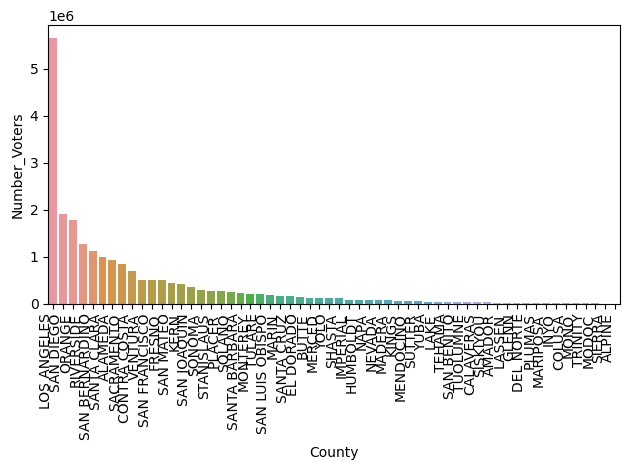

In [ ]:
ax1 = sns.barplot(data = CA_votes_per_county_df, \
            x = 'County', \
            y = 'Number_Voters')

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

#### Number of Voters per each Distinct Party

In [ ]:
CA_votes_per_party_df.head(9)

,Parties_Description,Number_Voters
0,Democratic,10096846
1,Republican,5242229
2,Non-Partisan,5122326
3,American Independent,683283
4,Libertarian,203924
5,Unknown,119856
6,Other,111988
7,Peace and Freedom,105632
8,Green,84968


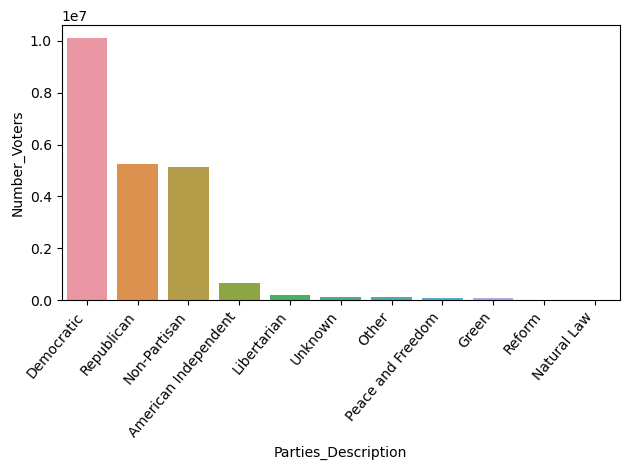

In [ ]:
ax2 = sns.barplot(data = CA_votes_per_party_df, \
            x = 'Parties_Description', \
            y = 'Number_Voters')

ax2.set_xticklabels(ax2.get_xticklabels(), rotation=50, ha="right")
plt.tight_layout()
plt.show()

#### Number of Voters per each Distinct Party in each Distinct County

In [ ]:
CA_votes_per_partycounty_df

,County,Parties_Description,Number_Voters
0,LOS ANGELES,Democratic,2978426
1,LOS ANGELES,Non-Partisan,1371431
2,LOS ANGELES,Republican,965496
3,SAN DIEGO,Democratic,776560
4,ORANGE,Democratic,656973
...,...,...,...
607,ALPINE,Unknown,1
608,DEL NORTE,Natural Law,1
609,CALAVERAS,Natural Law,1
610,MENDOCINO,Natural Law,1


In [ ]:
cols = CA_votes_per_county_df[['County']]
cols.head(5)

,County
0,LOS ANGELES
1,SAN DIEGO
2,ORANGE
3,RIVERSIDE
4,SAN BERNARDINO


'\nax3.set_xticklabels(ax3.get_xticklabels(), rotation=50, ha="right")\nplt.tight_layout()\nplt.show()\n'

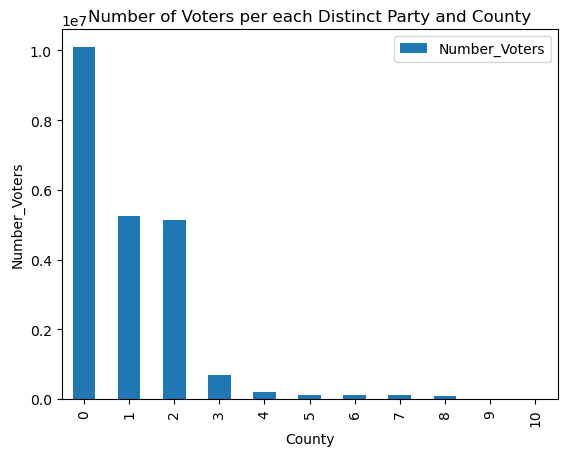

In [ ]:
index = ['ANCHORAGE', 'MATANUSKA SUSITNA', \
         'FAIRBANKS NORTH STAR', 'KENAI PENINSULA', \
         'JUNEAU']

CA_votes_per_party_df.plot(kind='bar', stacked=True)

plt.xlabel('County')
plt.ylabel('Number_Voters')

plt.title('Number of Voters per each Distinct Party and County')

"""
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=50, ha="right")
plt.tight_layout()
plt.show()
"""

### Missing Value Handling

In [ ]:
CA_cols_list = CA_df_ezra.columns # list of columns in CA_df

def count_missingvals(df, col_list):
    
    """Given dataframe of state voter files and its list of columns, returns the number of missing values
    
    Args:
        df: Dataframe of state voter files 
            Object type should be the output spark.read.parquet() function
        col_list: List of column names
            Object type should be the output df.columns
            
    
    Returns:
        df2.show(): 
    """
    
    df2 = df.select([count(when(col(i).contains('None') | \
                                col(i).contains('NULL') | \
                               (col(i) == '') | \
                                col(i).isNull() | \
                                isnan(i), i)).alias(i)
                    for i in col_list])
    
    return df2.show()

In [71]:
#count_missingvals(CA_df_ezra, CA_cols_list[:3])

## Party Affiliation for Age, Gender, Marital Status Voters in California

In [73]:
california_columns = CA_df_branson.columns

In [ ]:
california_columns
#Let's Select a Dependent Variable 

dependent_variable_branson = CA_df_branson.select('Parties_Description')
dependent_variable_branson.show()

#This gives us an idea of the type of data we are working with for our dependent variable

In [79]:
#Now we want to select features of interest that we want to include for our exploration

features_to_include_CA = CA_df_branson.select(['LALVOTERID','Voters_Age','Voters_Gender','MilitaryStatus_Description','MaritalStatus_Description','Parties_Description']).sample(False, 0.5, 42)


In [81]:
features_branson_CA = features_to_include_CA.toPandas()


In [83]:
features_branson_CA

,LALVOTERID,Voters_Age,Voters_Gender,MilitaryStatus_Description,MaritalStatus_Description,Parties_Description
0,LALCA482738060,55,F,None,None,Peace and Freedom
1,LALCA528502456,22,M,None,None,Democratic
2,LALCA572962902,20,M,None,None,Democratic
3,LALCA399677475,59,M,None,Married,Non-Partisan
4,LALCA130493819,44,F,None,None,Non-Partisan
...,...,...,...,...,...,...
10888579,LALCA605445607,19,M,None,None,Other
10888580,LALCA539224076,21,F,None,None,Non-Partisan
10888581,LALCA452922489,38,M,None,Non-Traditional,Republican
10888582,LALCA516070393,36,F,None,Non-Traditional,Republican


In [85]:
dropped_na_pandas_CA = features_branson_CA.dropna()



In [87]:
dropped_na_pandas_CA.head()

,LALVOTERID,Voters_Age,Voters_Gender,MilitaryStatus_Description,MaritalStatus_Description,Parties_Description
39,LALCA3654771,36,F,non-military,Married,Libertarian
157,LALCA25034025,66,F,non-military,Non-Traditional,Democratic
228,LALCA118453394,49,F,non-military,Married,Republican
229,LALCA118453392,51,M,non-military,Married,Republican
245,LALCA24973228,52,F,non-military,Non-Traditional,Republican


## Looking for Correlations

In [89]:
dropped_na_pandas_CA.apply(lambda x : pd.factorize(x)[0]).corr(method='spearman')

,LALVOTERID,Voters_Age,Voters_Gender,MilitaryStatus_Description,MaritalStatus_Description,Parties_Description
LALVOTERID,1.000000,-0.006941,-0.000293,-0.001483,-0.008050,-0.014106
Voters_Age,-0.006941,1.000000,0.014249,-0.000221,-0.023865,-0.005143
Voters_Gender,-0.000293,0.014249,1.000000,0.006415,-0.013421,0.069096
MilitaryStatus_Description,-0.001483,-0.000221,0.006415,1.000000,-0.001528,0.005635
MaritalStatus_Description,-0.008050,-0.023865,-0.013421,-0.001528,1.000000,-0.049452
Parties_Description,-0.014106,-0.005143,0.069096,0.005635,-0.049452,1.000000


Now to get an idea of some of the general patterns, we will use some aggregate functions on our dataframe after dropping the Null values

In [91]:
military_count = dropped_na_pandas_CA.groupby('MilitaryStatus_Description').agg({'MilitaryStatus_Description':'count'})
military_count.rename(columns={"MilitaryStatus_Description": 'count'})

,count
MilitaryStatus_Description,
Military,886
non-military,1440214


In [93]:
gender_count = dropped_na_pandas_CA.groupby('Voters_Gender').agg({'Voters_Gender':'count'})
gender_count.rename(columns={"Voters_Gender": 'count'})

,count
Voters_Gender,
F,698640
M,742460


In [94]:
married_count = dropped_na_pandas_CA.groupby('MaritalStatus_Description').agg({'MaritalStatus_Description':'count'})
married_count.rename(columns={"MaritalStatus_Description": 'count'})

,count
MaritalStatus_Description,
Married,1068812
Non-Traditional,372288


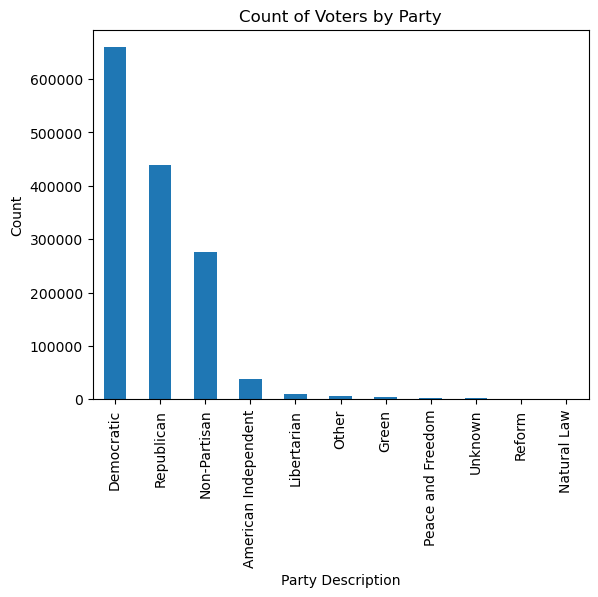

In [95]:
dropped_na_pandas_CA['Parties_Description'].value_counts().plot(kind='bar')
plt.title('Count of Voters by Party')
plt.xlabel('Party Description')
plt.ylabel('Count')
plt.show()

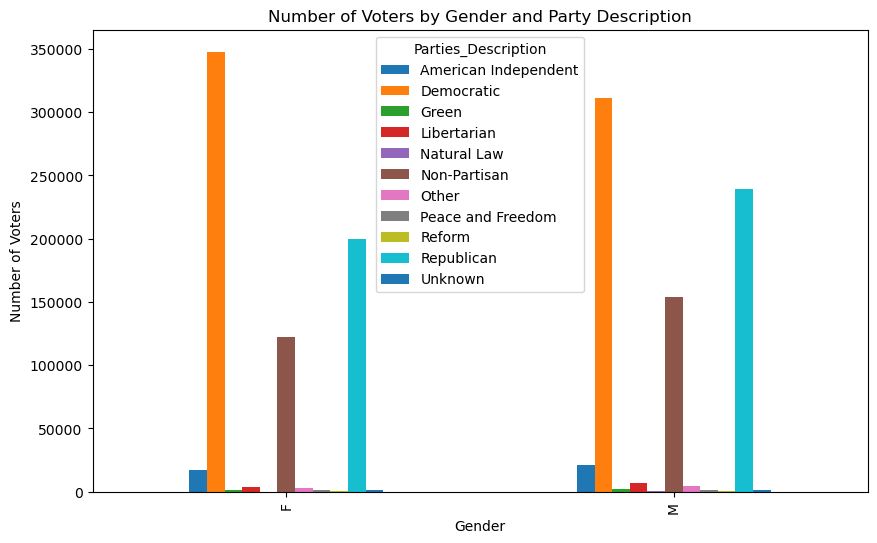

In [96]:
counts = dropped_na_pandas_CA.groupby(['Voters_Gender', 'Parties_Description']).size().unstack()


counts.plot(kind='bar', figsize=(10,6))


plt.title('Number of Voters by Gender and Party Description')
plt.xlabel('Gender')
plt.ylabel('Number of Voters')


plt.show()

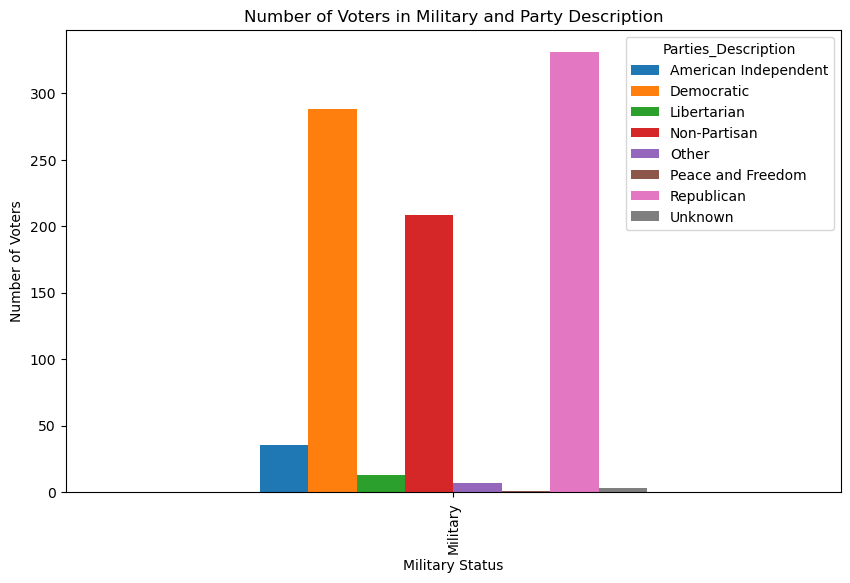

In [102]:
military_pandas_df = dropped_na_pandas_CA[dropped_na_pandas_CA['MilitaryStatus_Description'] == 'Military']
military_counts = military_pandas_df.groupby(['MilitaryStatus_Description', 'Parties_Description']).size().unstack()


military_counts.plot(kind='bar', figsize=(10,6))


plt.title('Number of Voters in Military and Party Description')
plt.xlabel('Military Status')
plt.ylabel('Number of Voters')


plt.show()

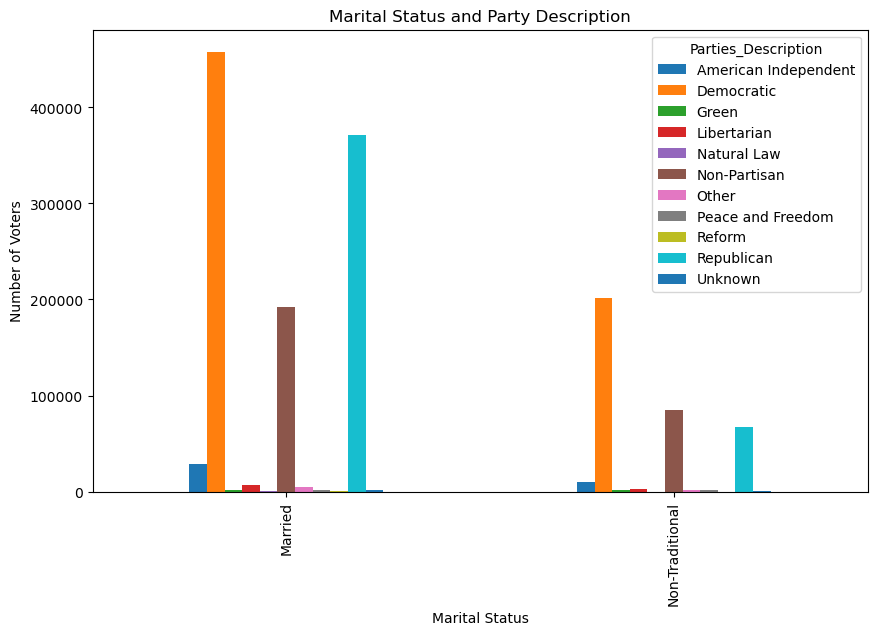

In [103]:

married_counts = dropped_na_pandas_CA.groupby(['MaritalStatus_Description', 'Parties_Description']).size().unstack()


married_counts.plot(kind='bar', figsize=(10,6))


plt.title('Marital Status and Party Description')
plt.xlabel('Marital Status')
plt.ylabel('Number of Voters')


plt.show()

## Party Affiliation based on Level of Education in California

In [104]:
from pyspark.sql import functions as F
   
new_df = CA_df.select("CommercialData_Education", "CommercialData_OccupationGroup", "Voters_Active", "Parties_Description")
new_df.show()


    
    


+------------------------+------------------------------+-------------+--------------------+
|CommercialData_Education|CommercialData_OccupationGroup|Voters_Active| Parties_Description|
+------------------------+------------------------------+-------------+--------------------+
|                    null|                          null|            A|          Republican|
|    Less than HS Dipl...|                       Retired|            A|          Republican|
|                    null|                          null|            A|        Non-Partisan|
|    Some College - Li...|                         Other|            A|   Peace and Freedom|
|    Bach Degree - Ext...|                       Retired|            A|          Democratic|
|     HS Diploma - Likely|                       Retired|            A|          Democratic|
|                    null|                          null|            A|          Democratic|
|                    null|                          null|            A

In [105]:
pd.crosstab(pandas_new_df['Parties_Description'], pandas_new_df['CommercialData_Education'])

CommercialData_Education,Bach Degree - Extremely Likely,Bach Degree - Likely,Grad Degree - Extremely Likely,Grad Degree - Likely,HS Diploma - Extremely Likely,HS Diploma - Likely,Less than HS Diploma - Ex Like,Less than HS Diploma - Likely,Some College - Likely,Some College -Extremely Likely,Vocational Technical Degree - Extremely Likely
Parties_Description,,,,,,,,,,,
Constitution,10,15,4,12,17,36,0,10,53,9,1
Democratic,5136,3860,2993,2483,4409,5762,2,1639,7781,1433,64
Green Libertarian,46,69,29,51,63,90,0,15,155,20,2
Independence,887,734,368,504,1133,1428,2,381,2060,385,21
Libertarian,239,323,87,189,254,414,0,108,740,99,8
Non-Partisan,6180,4189,3358,2851,5962,5878,7,1433,8550,2058,91
Other,57,65,13,45,93,127,0,45,193,29,6
Republican,10561,7466,4939,5012,10293,9502,6,2283,17264,4033,172
Unknown,11698,11285,5056,7277,13097,16830,12,4903,29308,4350,236


We are mainly targeting voters in the largest blue and red states (California and Alaska, respectively), but we require more exploration to narrow down our scope. We have so far focused mainly on party affiliation, personal background, and county of origin.